## Number of files and size of directories

In order to get a better sense of the number of files and the size of the directories, let's make some histograms.

First, let's extract some data.

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as P
import matplotlib.pyplot as plt

In [12]:
sfm = [] 
i=0
with open("statfiles/numfiles-SFM.txt") as s:
    for line in s:
        info = line.split()
        sfm.append(info)
        sfm[i][1] = int(sfm[i][1])
        i+=1
        

deep = []
i = 0
with open("statfiles/numfiles-DEEP.txt") as s:
    for line in s:
        info = line.split()
        deep.append(info)
        deep[i][1] = int(deep[i][1])
        i+=1
        
udeep= []
i = 0
with open("statfiles/numfiles-UDEEP.txt") as s:
    for line in s:
        info = line.split()
        udeep.append(info)
        udeep[i][1] = int(udeep[i][1])
        i+=1
      
wide = []
i= 0
with open("statfiles/numfiles-WIDE.txt") as s:
    for line in s:
        info = line.split()
        wide.append(info)
        wide[i][1] = int(wide[i][1])
        i+=1
        

        

In [13]:
print(sfm[0])
print(deep[0])
print(wide[0])
print(udeep[0])

['/datasets/hsc/repo/rerun/DM-10404/SFM.:', 4664198]
['/datasets/hsc/repo/rerun/DM-10404/DEEP.:', 829604]
['/datasets/hsc/repo/rerun/DM-10404/WIDE.:', 5688860]
['/datasets/hsc/repo/rerun/DM-10404/UDEEP.:', 411557]


In [14]:
print(sfm)

[['/datasets/hsc/repo/rerun/DM-10404/SFM.:', 4664198], ['./01170:', 92400], ['./01170/HSC-Z:', 83325], ['./01170/HSC-Z/output:', 41612], ['./01170/HSC-Z/singleFrameDriver_metadata:', 101], ['./01170/HSC-Z/corr:', 20806], ['./01170/HSC-Z/thumbs:', 20806], ['./01170/NB0921:', 9075], ['./01170/NB0921/output:', 4532], ['./01170/NB0921/singleFrameDriver_metadata:', 11], ['./01170/NB0921/corr:', 2266], ['./01170/NB0921/thumbs:', 2266], ['./01001:', 9075], ['./01001/HSC-Z:', 9075], ['./01001/HSC-Z/output:', 4532], ['./01001/HSC-Z/singleFrameDriver_metadata:', 11], ['./01001/HSC-Z/corr:', 2266], ['./01001/HSC-Z/thumbs:', 2266], ['./metadata:', 1], ['./01382:', 170760], ['./01382/HSC-G:', 170760], ['./01382/HSC-G/output:', 85275], ['./01382/HSC-G/singleFrameDriver_metadata:', 207], ['./01382/HSC-G/corr:', 42636], ['./01382/HSC-G/thumbs:', 42642], ['./01315:', 12370], ['./01315/NB0816:', 12370], ['./01315/NB0816/output:', 6177], ['./01315/NB0816/singleFrameDriver_metadata:', 15], ['./01315/NB081

[4664198  829604  411557 5688860]
4


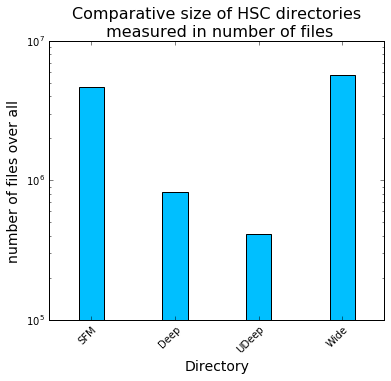

In [100]:
import matplotlib.pyplot as plt

names = ['SFM', 'Deep', 'UDeep', 'Wide']
data = [sfm[0][1], deep[0][1], udeep[0][1], wide[0][1]]
data =np.asarray(data)

print(data)

fig = plt.figure(figsize=(6,5))

ax =fig.add_subplot(111)

width = 0.3
bins = list(map((lambda x: x-width/2),range(1,len(data)+1)))
print(len(bins))
ax.bar(bins,data,width=width, color='deepskyblue')
ax.set_xticks(list(map(lambda x: x, range(1,len(data)+1))))
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
plt.yscale('log')
plt.xlabel('Directory', size=14)
plt.ylabel('number of files over all', size=14)
plt.title("Comparative size of HSC directories\n measured in number of files", size=16)
plt.savefig("num_dir_files.png")
plt.show()

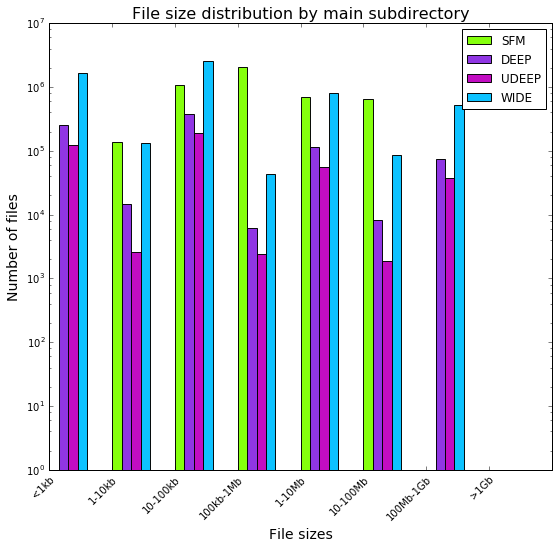

In [101]:
names = ['<1kb', '1-10kb', '10-100kb', '100kb-1Mb', '1-10Mb','10-100Mb', '100Mb-1Gb', '>1Gb']
data = np.array([[1, 136529, 1074707, 2095232, 700882, 657254, 0, 0],
                 [252854, 14517, 378114, 6079, 113210, 8135, 74689, 0],
                 [124808, 2579, 190678, 2411, 55284, 1871, 37916, 0],
                 [1678871, 131448, 2572612, 42681, 798650, 86381, 532786, 1]])
#print(data[0])

fig = plt.figure(figsize=(9,8))

ax =fig.add_subplot(111)

width = 0.15
bins = np.arange(0, len(data[0]))
#print(len(bins))

ax.bar(bins,data[0],width=width, label='SFM', color='chartreuse', alpha=0.95)
ax.bar(bins+width,data[1],width=width, label='DEEP', color = 'blueviolet', alpha=0.95)
ax.bar(bins+(2*width),data[2],width=width, label='UDEEP', color='m', alpha=0.95)
ax.bar(bins+(3*width),data[3],width=width, label='WIDE', color='deepskyblue', alpha=0.95)

ax.set_xticks(list(map(lambda x: x, range(0,len(data[0])))))
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
plt.yscale('log')
plt.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
plt.xlabel('File sizes', size=14)
plt.ylabel('Number of files',size=14)
plt.title("File size distribution by main subdirectory", size=16)
plt.savefig("file_size_dist.png")
plt.show()

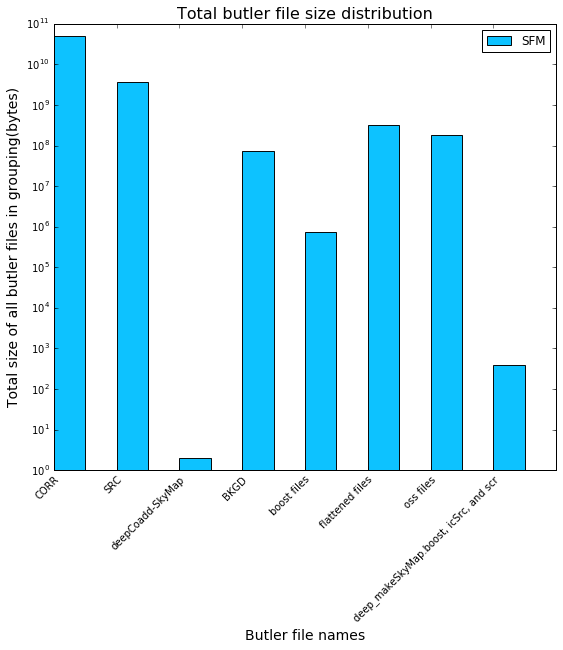

In [8]:
names = ['CORR', 'SRC', 'deepCoadd-SkyMap', 'BKGD', 'boost files','flattened files',
         'oss files', 'deep_makeSkyMap.boost, icSrc, and scr']
data = np.array([48818690560, 3741211648, 2, 74532352, 723712, 323033600, 184914688, 384])
#print(data[0])

fig = plt.figure(figsize=(9,8))

ax =fig.add_subplot(111)

width = 0.50
bins = np.arange(0, len(data))
#print(len(bins))

ax.bar(bins,data,width=width, label='SFM', color='deepskyblue', alpha=0.95)

ax.set_xticks(list(map(lambda x: x, range(0,len(data)))))
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
plt.yscale('log')
plt.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
plt.xlabel('Butler file names', size=14)
plt.ylabel('Total size of all butler files in grouping(bytes)',size=14)
plt.title("Total butler file size distribution", size=16)
plt.savefig("butler_size_smf.png")
plt.show()

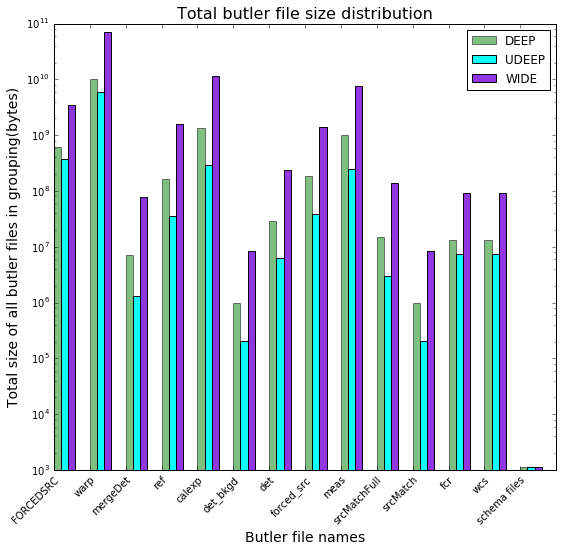

In [22]:
names = ['FORCEDSRC', 'warp', 'mergeDet', 'ref', 'calexp','det_bkgd', 'det', 
         'forced_src', 'meas', 'srcMatchFull', 'srcMatch', 'fcr', 'wcs', 'schema files']
data = np.array([[605685888, 10268512896, 7038080, 164675200, 1348491776, 979328, 28803072,
                 187981824, 1027180160, 15063424, 976640, 13304320, 13304320, 1152],
                 
                 [367813376, 5984552832, 1286528, 35640704, 292967552, 201600, 6385792,
                 39190528, 249456000, 2940032, 201216, 7392256, 7392256, 1152],
                 
                 [3525166592, 70988704000, 77769856, 1601865088, 11439947264, 8359552, 233454464, 
                  1408816640, 7561067520, 141860224, 8352896, 91369472, 91369472, 1152]])
#print(data[0])

fig = plt.figure(figsize=(9,8))

ax =fig.add_subplot(111)

width = 0.2
bins = np.arange(0, len(data[0]))
#print(len(bins))

ax.bar(bins,data[0],width=width, label='DEEP', color = 'green', alpha=0.50)
ax.bar(bins+(width),data[1],width=width, label='UDEEP', color='cyan', alpha=0.95)
ax.bar(bins+(2*width),data[2],width=width, label='WIDE', color='blueviolet', alpha=0.95)

ax.set_xticks(list(map(lambda x: x, range(0,len(data[0])))))
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
plt.yscale('log')
plt.legend(loc='upper right')#, bbox_to_anchor=(1, 0.5))
plt.xlabel('Butler file names', size=14)
plt.ylabel('Total size of all butler files in grouping(bytes)',size=14)
plt.title("Total butler file size distribution", size=16)
plt.savefig("butler_size_duw.png")
plt.show()

In [12]:
f = open("/Users/Sam/Downloads/butler_stat-WIDE.txt", 'r')
s = f.readlines()
p = str(s)

total = 0
name = "Nothing"
for line in s:
    line = line.replace('total', '')
    line = line.strip("\n")
    printnum = 0
    try: 
        printnum += int(line)
        total += printnum
        #print("Adding: ", printnum)
    except ValueError:
        #print("Invalid Literal for Int() With Base 10:", ValueError)
        print(name, "\t ", total)
        name = line
        total = 0

print(name, "\t", total)

Nothing 	  0
FORCEDSRC 	  3525166592
forcedPhotCcd_metadata 	  0
warp 	  70988704000
mergeDet 	  77769856
ref 	  1601865088
calexp 	  11439947264
det_bkgd 	  8359552
det 	  233454464
forced_src 	  1408816640
meas 	  7561067520
srcMatchFull 	  141860224
srcMatch 	  8352896
fcr 	  91369472
wcs 	  91369472
deepCoadd_det 	  128
deepCoadd_forced_src 	  128
deepCoadd_meas 	  256
deepCoadd_mergeDet 	  128
deepCoadd_peak 	  128
deepCoadd_ref 	  256
forced_src_schema 	 128
